## Load Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

### - Load Dataset

In [32]:
dataset_pype = pd.read_excel('Comparison Dataset/Catalent BWI.xlsx', dtype = object, engine = 'openpyxl')
dataset_production = pd.read_excel('Comparison Dataset/Catalent BWI - Submittal Log.xlsx', dtype = object, engine = 'openpyxl')

### - View Pype Dataset

In [33]:
dataset_pype.head()

,S. No.,Spec #,Spec Name,Para,Sub Section Heading,Submittal Type,Submittal Description,Target Date,Subcontractor
0,44,024119,SELECTIVE DEMOLITION,1.10-A,WARRANTY,Warranty,"Existing Warranties : Remove, replace, patch, ...",NaN,NaN
1,45,024119,SELECTIVE DEMOLITION,1.10-B,WARRANTY,Warranty,Notify warrantor on completion of selective de...,NaN,NaN
2,36,024119,SELECTIVE DEMOLITION,1.5-A,PREINSTALLATION MEETINGS,Meetings,Predemolition Conference : Conduct conference ...,NaN,NaN
3,37,024119,SELECTIVE DEMOLITION,1.6-A,INFORMATIONAL SUBMITTALS,Measurements,"Proposed Protection Measures : Submit report, ...",NaN,NaN
4,38,024119,SELECTIVE DEMOLITION,1.6-B,INFORMATIONAL SUBMITTALS,Schedules,Schedule of Selective Demolition Activities : ...,NaN,NaN


### - View Production Dataset

In [34]:
dataset_production.head()

,Submittal ID,Submittal Name,Unnamed: 2,Spec Section Number,Spec Sub Section,No. of Copies,Type Code,Preparation By Company Code,Preparation By Contact Code,Approved by Company Code,...,Forwarded to Company Code,Forward to Contact code,Activity Start Date,Delivery Lead Time,Fabrication Lead Time,Float Lead Time,Approval Lead Time,Review Lead Time,Preparation Lead Time,Procurement Flag
0,NaN,Polished Concrete Finishing_Polishing,yes,033543,1.4-B,Polishing Schedule : Submit plan showing polis...,Schedule,Schedule,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Polished Concrete Finishing_Product Requiring ...,yes,033543,1.4-C,NaN,Sample,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Polished Concrete Finishing_Installer_Informat...,yes,033543,1.5-A,NaN,Qualifications,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Polished Concrete Finishing_Repair Materials_I...,yes,033543,1.5-B-1,NaN,Certificate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Polished Concrete Finishing_Stain Materials_In...,yes,033543,1.5-B-2,NaN,Certificate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation For Pype Dataset

### - Drop Unwanted Features

In [35]:
dataset_pype = dataset_pype.drop(columns = dataset_pype.columns[[0, 2, 4, 7, 8]])
dataset_pype.head()

,Spec #,Para,Submittal Type,Submittal Description
0,024119,1.10-A,Warranty,"Existing Warranties : Remove, replace, patch, ..."
1,024119,1.10-B,Warranty,Notify warrantor on completion of selective de...
2,024119,1.5-A,Meetings,Predemolition Conference : Conduct conference ...
3,024119,1.6-A,Measurements,"Proposed Protection Measures : Submit report, ..."
4,024119,1.6-B,Schedules,Schedule of Selective Demolition Activities : ...


### - Change Column Names

In [36]:
dataset_pype.columns = ['Spec Section Number', 'Spec Sub Section', 'Submittal Type', 'Submittal Description']
dataset_pype.head()

,Spec Section Number,Spec Sub Section,Submittal Type,Submittal Description
0,024119,1.10-A,Warranty,"Existing Warranties : Remove, replace, patch, ..."
1,024119,1.10-B,Warranty,Notify warrantor on completion of selective de...
2,024119,1.5-A,Meetings,Predemolition Conference : Conduct conference ...
3,024119,1.6-A,Measurements,"Proposed Protection Measures : Submit report, ..."
4,024119,1.6-B,Schedules,Schedule of Selective Demolition Activities : ...


### - Remove Different Records

In [37]:
dataset_pype.drop(dataset_pype.index[641:654], inplace = True)
dataset_pype.reset_index(inplace = True, drop = True)
dataset_pype.drop(dataset_pype.index[691:693], inplace = True)
dataset_pype.reset_index(inplace = True, drop = True)
dataset_pype.drop(dataset_pype.index[662:663], inplace = True)
dataset_pype.reset_index(inplace = True, drop = True)

### - Change Datatype Of Features

In [38]:
dataset_pype['Spec Section Number'] = dataset_pype['Spec Section Number'].astype('float')

### - Check All Unique Submittal Types

In [39]:
dataset_pype['Submittal Type'].unique()

array(['Warranty', 'Meetings', 'Measurements', 'Schedules', 'Photos',
       'Statement Of Refrigerant Recovery', 'Inventory', 'Product Data',
       'General', 'Performance Data', 'Drawings', 'Reports',
       'Maintenance Data', 'Certifications', 'Delegated-Design Submittal',
       'Shop Drawings', 'Construction Joint Layout', 'Qualification Data',
       'Certificates', 'Mix Design', 'Test Reports', 'Meeting Minutes',
       'Samples', 'Mockups', 'Cold-Weather And Hot-Weather Procedures',
       'Manufacturers Warranty', 'Temporary Roofing Submittal',
       'Landfill Records', 'Special Warranty',
       'Wind Uplift Resistance Submittal', 'Sample Warranty',
       'Coordination Drawings', 'O&M Manuals', 'Product Schedule',
       'Fabrication', 'As-Builts', 'O&M Training And Demonstration',
       'Quality-Control Program', 'Keying Schedule', 'Attic Stock',
       'Maintenance Service', 'Wiring Diagram',
       'Manufacturers Instructions'], dtype=object)

### - Store PyPe Result

In [40]:
dataset_pype.to_excel('PYPE.xlsx')

## Data Preparation For Production Dataset

### - Filter and Create New Dataframe With Proper Data Format and Data

In [41]:
## Empty DataFrame
#
dataset_production_filtered = pd.DataFrame()
dataset_production_filtered.head()

""


In [42]:
## Filter and Create New Dataframe In Proper Format
# 
def data_filter(row):
    spec_section_number = row[3]
    spec_subsection = row[4]
    submittal_type = row[6]
    
    previous = ""
    now = '-'.join(str(spec_subsection).split('-')[0:2])

    if(previous == now):
        pass
    else:
        previous = now
        return spec_section_number, previous, submittal_type
        
dataset_production_filtered[['Spec Section Number', 'Spec Sub Section', 'Submittal Type']] = dataset_production.apply(func = data_filter, axis = 1, result_type="expand")


In [43]:
## Filter and Create New Dataframe In Proper Format
# 
def data_filter(row):
    spec_section_number = row[0]
    if(str(spec_section_number).endswith('.00')):
        return int(str(spec_section_number)[0:-3])
    else:
        return spec_section_number
        
dataset_production_filtered['Spec Section Number'] = dataset_production_filtered.apply(func = data_filter, axis = 1, result_type="expand")


### - Change Datatype Of Features

In [44]:
## Change DataType Of Feature
#
dataset_production_filtered['Spec Section Number'] = dataset_production_filtered['Spec Section Number'].astype('float')

### - Compare Submittal Type Spellings and Correct Some

In [45]:
dataset_production_filtered['Submittal Type'].unique()

array(['Schedule', 'Sample', 'Qualifications', 'Certificate',
       'Product Data', 'Shop Drawings', 'Mix Design', 'Report',
       'Procedures', 'Record Drawing', 'Test Data', 'Warranty',
       'Leed Requirements', 'Calculations', 'MSDS', 'Maintenance Data',
       'report', 'product Data', 'Attic Stock'], dtype=object)

In [46]:
dataset_pype['Submittal Type'].unique()

array(['Warranty', 'Meetings', 'Measurements', 'Schedules', 'Photos',
       'Statement Of Refrigerant Recovery', 'Inventory', 'Product Data',
       'General', 'Performance Data', 'Drawings', 'Reports',
       'Maintenance Data', 'Certifications', 'Delegated-Design Submittal',
       'Shop Drawings', 'Construction Joint Layout', 'Qualification Data',
       'Certificates', 'Mix Design', 'Test Reports', 'Meeting Minutes',
       'Samples', 'Mockups', 'Cold-Weather And Hot-Weather Procedures',
       'Manufacturers Warranty', 'Temporary Roofing Submittal',
       'Landfill Records', 'Special Warranty',
       'Wind Uplift Resistance Submittal', 'Sample Warranty',
       'Coordination Drawings', 'O&M Manuals', 'Product Schedule',
       'Fabrication', 'As-Builts', 'O&M Training And Demonstration',
       'Quality-Control Program', 'Keying Schedule', 'Attic Stock',
       'Maintenance Service', 'Wiring Diagram',
       'Manufacturers Instructions'], dtype=object)

In [47]:
## Data Correct
#
def data_correct(row):
    sub_tupe = row[2]
    if(sub_tupe == 'Certificate'):
        return 'Certificates'
    elif(sub_tupe == 'Report'):
        return 'Reports'
    elif(sub_tupe == 'report'):
        return 'Reports'
    elif(sub_tupe == 'product Data'):
        return 'Product Data'
    elif(sub_tupe == 'Schedule'):
        return 'Schedules'
    elif(sub_tupe == 'Samples'):
        return 'Sample'
    else:
        return sub_tupe
        
dataset_production_filtered['Submittal Type'] = dataset_production_filtered.apply(func = data_correct, axis = 1, result_type="expand")

### - Visualize Production Submittal Type Counts


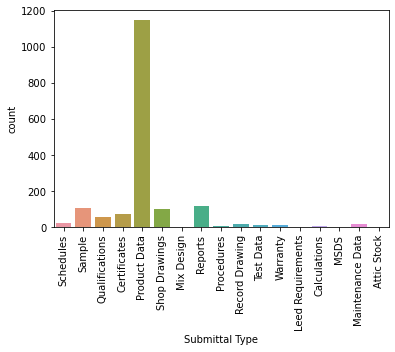

In [48]:
## Visualize count
#
sns.countplot(data = dataset_production_filtered,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

### - Filter Production Dataset To Trained Submittal Types

In [49]:
options = ['Attic Stock', 'Calculations', 'Certificates', 'Certifications', 'Maintenance Data', 'Mix Design', 'Mockups',\
            'Product Data', 'Reports', 'Samples', 'Schedules', 'Shop Drawings']

In [50]:
dataset_production_filtered = dataset_production_filtered[dataset_production_filtered['Submittal Type'].isin(options)]


### - Visualize Production Submittal Type Counts After Filter


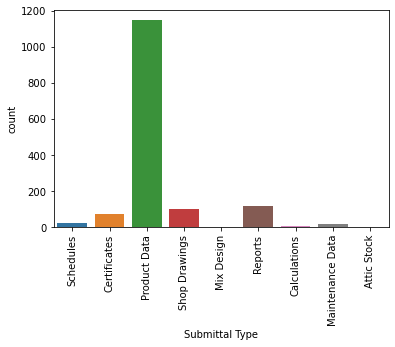

In [51]:
## Visualize count
#
sns.countplot(data = dataset_production_filtered,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

## Merge Both Production, Pype Dataset and Save Merged Dataset

### - Merge

In [52]:
## Merge Both Dataset On Spec Section Number and Spec Sub Section
#
final_dataset = pd.merge(dataset_production_filtered, dataset_pype, on = ['Spec Section Number', 'Spec Sub Section'])
final_dataset.head()

,Spec Section Number,Spec Sub Section,Submittal Type_x,Submittal Type_y,Submittal Description
0,33543.0,1.4-B,Schedules,Schedules,Polishing Schedule : Submit plan showing polis...
1,33543.0,1.5-B,Certificates,Certificates,Material Certificates : For each of the follow...
2,33543.0,1.5-B,Certificates,Certificates,Material Certificates : For each of the follow...
3,33543.0,1.5-B,Certificates,Certificates,Material Certificates : For each of the follow...
4,42200.0,1.5-B,Shop Drawings,Shop Drawings,Shop Drawings : For the following: \n1. Masonr...


### - Remove Duplicate Records and Change Column Names

In [53]:
## Remove Duplicate Records
#
final_dataset.drop_duplicates(inplace = True)

In [54]:
final_dataset.head()

,Spec Section Number,Spec Sub Section,Submittal Type_x,Submittal Type_y,Submittal Description
0,33543.0,1.4-B,Schedules,Schedules,Polishing Schedule : Submit plan showing polis...
1,33543.0,1.5-B,Certificates,Certificates,Material Certificates : For each of the follow...
4,42200.0,1.5-B,Shop Drawings,Shop Drawings,Shop Drawings : For the following: \n1. Masonr...
7,42200.0,1.6-B,Certificates,Certificates,Material Certificates : For each type and size...
14,42200.0,1.6-C,Mix Design,Mix Design,Mix Designs : For each type of mortar and grou...


In [55]:
final_dataset.columns = ['Spec Section Number', 'Spec Sub Section', 'Production SUBType', 'PyPe SUBType', 'Submittal Description']


### - Store Merged Results

In [56]:
## Store Merged Dataset For Prediction
#
final_dataset.to_excel('merged_test_dataset.xlsx')

## Comparision Pype and Our Model Results

### - Load Saved Model, Vectorizer and Encoder

In [65]:
## Load Saved Model, Vectorizer and Encoder
#
with open("vectorizer.pickle", 'rb+') as file:
    vectorizer_saved = pickle.load(file)

with open("label_encoder.pickle", 'rb+') as file:
    encorder_saved = pickle.load(file)

with open("type_classifier.pickle", 'rb+') as file:
    classifier_saved = pickle.load(file)

### - Encode - Vectorize - Predict - Score

In [68]:
options = ['Attic Stock', 'Calculations', 'Certificates', 'Color', 'Chart Delivery', 'Leed Requirements', 'Maintenance Data' , 'Manufacturer/Installation Cert', \
            'Mix Design', 'Mockups', 'MSDS', 'Owner Training', 'Product Data', 'Pre-Install Meeting Minutes', 'Procedures', 'Qualifications', 'Record Drawing', \
            'Reports', 'Samples', 'Schedules', 'Shop Drawings', 'Test Data', 'Certifications']

final_dataset = final_dataset[final_dataset['PyPe SUBType'].isin(options)]


In [69]:
## Encoder Sumittal Type
#
y_test = encorder_saved.transform(final_dataset['PyPe SUBType'])

In [70]:
X_test_tfidf = vectorizer_saved.transform(final_dataset['Submittal Description'])

In [71]:
predictions = classifier_saved.predict(X_test_tfidf)

In [72]:
score = metrics.accuracy_score(y_test, predictions) * 100
score

95.70552147239265

## Comparision Production and Our Model Results

### - Load Saved Model, Vectorizer and Encoder

In [57]:
## Load Saved Model, Vectorizer and Encoder
#
with open("vectorizer.pickle", 'rb+') as file:
    vectorizer_saved = pickle.load(file)

with open("label_encoder.pickle", 'rb+') as file:
    encorder_saved = pickle.load(file)

with open("type_classifier.pickle", 'rb+') as file:
    classifier_saved = pickle.load(file)

### - Encode - Vectorize - Predict - Score

In [58]:
## Encoder Sumittal Type
#
y_test = encorder_saved.transform(final_dataset['Production SUBType'])

In [59]:
X_test_tfidf = vectorizer_saved.transform(final_dataset['Submittal Description'])

In [60]:
predictions = classifier_saved.predict(X_test_tfidf)

In [61]:
score = metrics.accuracy_score(y_test, predictions) * 100
score

75.31914893617021

### - Saved Predicted Label In Same Excel

In [89]:
# final_dataset['Predicted Labels'] = encorder_saved.inverse_transform(predictions)

In [92]:
# final_dataset.to_excel("Predicted.xlsx")

## Comparision Of Pype and Production

### - Sumittal Types Different

In [62]:
final_dataset['PyPe SUBType'].unique()

array(['Schedules', 'Certificates', 'Shop Drawings', 'Mix Design',
       'General', 'Product Data', 'Delegated-Design Submittal',
       'Test Reports', 'Reports', 'Temporary Roofing Submittal', 'Photos',
       'Wind Uplift Resistance Submittal', 'Product Schedule',
       'Certifications', 'Quality-Control Program', 'Keying Schedule',
       'Qualification Data', 'Drawings'], dtype=object)

In [63]:
final_dataset['Production SUBType'].unique()

array(['Schedules', 'Certificates', 'Shop Drawings', 'Mix Design',
       'Reports', 'Product Data', 'Calculations', 'Maintenance Data'],
      dtype=object)

### - Finding Matching Percentage

In [64]:
X = final_dataset['PyPe SUBType'].to_list()
Y = final_dataset['Production SUBType'].to_list()

metrics.accuracy_score(X, Y)

0.5531914893617021

## Convert Notebook to PDF

In [5]:
!jupyter nbconvert --to PDFviaHTML "production_comparison.ipynb"


[NbConvertApp] Converting notebook production_comparison.ipynb to PDFviaHTML
[NbConvertApp] Writing 309674 bytes to production_comparison.pdf
